# Telco Customer Churn Analysis

In [235]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [236]:
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import train_test_split

## 1. Understanding the dataset

### import the dataset

#### A. Looking at all the different files in the dataset

In [237]:
import os
directory_contents = os.listdir('telco-data')
for file in directory_contents:
    print(file)

CustomerChurn.xlsx
Telco_customer_churn.xlsx
Telco_customer_churn_demographics.xlsx
Telco_customer_churn_location.xlsx
Telco_customer_churn_population.xlsx
Telco_customer_churn_services.xlsx
Telco_customer_churn_status.xlsx
~$Telco_customer_churn_status.xlsx
~$CustomerChurn.xlsx


#### B. Reading the Main Dataset for Churn

In [238]:
churnData = pd.read_excel('telco-data/CustomerChurn.xlsx')
churnData.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### C. Reading the Demographic Dataset

In [239]:
churnDemographics = pd.read_excel('telco-data/Telco_customer_churn_demographics.xlsx')
churnDemographics.head(5)

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


#### D. Reading the Location Dataset

In [240]:
churnLocation = pd.read_excel('telco-data/Telco_customer_churn_location.xlsx')
churnLocation.head(5)

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


#### E. Reading the Location Dataset

In [241]:
churnPopulation = pd.read_excel('telco-data/Telco_customer_churn_population.xlsx')
churnPopulation.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


#### F. Reading the Services Dataset the customers were using

In [242]:
churnServices = pd.read_excel('telco-data/Telco_customer_churn_services.xlsx')
churnServices.head(5)

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


#### G. Reading the Customer Status Dataset

In [243]:
churnStatus = pd.read_excel('telco-data/Telco_customer_churn_status.xlsx')
churnStatus.head(5)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


### 2. Merging all the Datasets in to one

In [244]:
churnCombined = churnData.merge(churnStatus,on='Customer ID',how='inner')
churnCombined.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved


#### A-1: Finding the distinct columns that needed to be joined between the main dataset and Demographic Dataset

In [245]:
distinct_columns = set(churnDemographics.columns) - set(churnCombined.columns) #Finding the distinct columns that needed to be joined
distinct_columns.add('Customer ID')

#### A-2: Merging the distinct column from demographics dataset using left join to the main dataset

In [246]:
churnCombined_2 = churnCombined.merge(churnDemographics[list(distinct_columns)],on='Customer ID',how='left')
churnCombined_2.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age,Gender,Number of Dependents,Married,Under 30
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,0,27,3964,NaN,NaN,36,Female,0,Yes,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,0,61,3441,NaN,NaN,46,Male,0,No,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,1,86,3239,Competitor,Competitor made better offer,37,Male,0,No,No
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,0,66,4307,NaN,NaN,53,Male,0,No,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,1,67,2701,Other,Moved,19,Female,2,No,Yes


#### B-1:Finding the distinct columns that needed to be joined between the combined dataset and Services Dataset

In [247]:
distinct_columns_2 = set(churnServices.columns) - set(churnCombined_2.columns)
distinct_columns_2.add('Customer ID')
distinct_columns_2

{'Avg Monthly GB Download',
 'Avg Monthly Long Distance Charges',
 'Customer ID',
 'Device Protection Plan',
 'Internet Type',
 'Monthly Charge',
 'Number of Referrals',
 'Offer',
 'Premium Tech Support',
 'Referred a Friend',
 'Service ID',
 'Streaming Music',
 'Tenure in Months',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Refunds',
 'Total Revenue',
 'Unlimited Data'}

#### B-2: Merging the distinct column from services dataset using left join to the combined dataset

In [248]:
churnCombined_3 = churnCombined_2.merge(churnServices[list(distinct_columns_2)],on='Customer ID',how='left')
churnCombined_3.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Total Long Distance Charges,Number of Referrals,Total Refunds,Service ID,Avg Monthly GB Download,Premium Tech Support,Referred a Friend,Device Protection Plan,Internet Type,Unlimited Data
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,0.00,0,0.0,FRZCGDEGJ1299,10,No,No,No,DSL,Yes
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,581.06,0,0.0,ZYMHBYTQE1796,16,No,No,Yes,DSL,Yes
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,20.94,0,0.0,ZLZTZWPWE3351,21,No,No,No,DSL,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,0.00,0,0.0,KXVIIYGAJ8877,10,Yes,No,Yes,DSL,Yes
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,18.24,0,0.0,GXJVSQIYH4715,51,No,No,No,Fiber Optic,Yes


#### C-1: Finding the distinct columns that needed to be joined between the combined dataset and location Dataset

In [249]:
distinct_columns_3 = set(churnLocation.columns) - set(churnCombined_3.columns)
distinct_columns_3.add('Customer ID')
distinct_columns_3

{'City',
 'Country',
 'Customer ID',
 'Lat Long',
 'Latitude',
 'Location ID',
 'Longitude',
 'State',
 'Zip Code'}

#### C-2: Merging the distinct column from services dataset using left join to the combined dataset

In [250]:
churnCombined_4 = churnCombined_3.merge(churnLocation[list(distinct_columns_3)],on='Customer ID',how='left')
churnCombined_4.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Internet Type,Unlimited Data,Latitude,Location ID,Country,Lat Long,State,Zip Code,Longitude,City
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,DSL,Yes,33.973616,KQVCVY8549,United States,"33.973616, -118.24902",California,90001,-118.249020,Los Angeles
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,DSL,Yes,33.949255,PIYXEN8915,United States,"33.949255, -118.246978",California,90002,-118.246978,Los Angeles
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,DSL,Yes,33.964131,PZZUIT6837,United States,"33.964131, -118.272783",California,90003,-118.272783,Los Angeles
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,DSL,Yes,34.076259,KVBPAB7894,United States,"34.076259, -118.310715",California,90004,-118.310715,Los Angeles
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,Fiber Optic,Yes,34.059281,CKNALR2542,United States,"34.059281, -118.30742",California,90005,-118.307420,Los Angeles


#### D-1: Finding the distinct columns that needed to be joined between the combined dataset and population Dataset

In [251]:
distinct_columns_4 = set(churnPopulation.columns) - set(churnCombined_4.columns)
distinct_columns_4.add('Zip Code')
distinct_columns_4.remove('ID')
distinct_columns_4

{'Population', 'Zip Code'}

#### D-2: Merging the distinct column from population dataset using left join to the combined dataset

In [252]:
churnCombined_5 = churnCombined_4.merge(churnPopulation[list(distinct_columns_4)],on='Zip Code',how='left')
churnCombined_5.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Unlimited Data,Latitude,Location ID,Country,Lat Long,State,Zip Code,Longitude,City,Population
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,Yes,33.973616,KQVCVY8549,United States,"33.973616, -118.24902",California,90001,-118.249020,Los Angeles,54492
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,33.949255,PIYXEN8915,United States,"33.949255, -118.246978",California,90002,-118.246978,Los Angeles,44586
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,Yes,33.964131,PZZUIT6837,United States,"33.964131, -118.272783",California,90003,-118.272783,Los Angeles,58198
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,34.076259,KVBPAB7894,United States,"34.076259, -118.310715",California,90004,-118.310715,Los Angeles,67852
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,Yes,34.059281,CKNALR2542,United States,"34.059281, -118.30742",California,90005,-118.307420,Los Angeles,43019


#### E: Our Final Combined Dataset

In [253]:
churnCombined_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LoyaltyID                          7043 non-null   int64  
 1   Customer ID                        7043 non-null   object 
 2   Senior Citizen                     7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Tenure                             7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Online Security                    7043 non-null   object 
 10  Online Backup                      7043 non-null   object 
 11  Device Protection                  7043 non-null   objec

#### Summary of Combined Dataset
* We have a total of 62 Columns and max of 7043 rows
* Most columns are categorical variables
* Some columns can be dropped that are not useful
* Some columns have nan values that need to be fixed

### 3. Cleaning and Pre-processing the Data

#### A. Changing the Total Charges colum from string to integer

In [254]:
churnCombined_5['Total Charges'] = pd.to_numeric(churnCombined_5['Total Charges'], errors='coerce', downcast='integer')

#### B. Dealing with missing values in 'Offer' Column

In [255]:
churnCombined_5['Offer'].unique()

array(['Offer E', nan, 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [256]:
churnCombined_5['Offer'].fillna('No Offer', inplace=True)
churnCombined_5['Offer'].info()
print('\n',churnCombined_5['Offer'].unique())

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Offer
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB

 ['Offer E' 'No Offer' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


In [257]:
churnCombined_5['Offer'].unique()

array(['Offer E', 'No Offer', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

#### C. Dealing with Missing values from 'Churn Category','Churn Reason' and other columns

In [258]:
print(churnCombined_5['Churn Category'].unique(),'\n')
print(churnCombined_5['Churn Category'].info())

[nan 'Competitor' 'Other' 'Price' 'Dissatisfaction' 'Attitude'] 

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn Category
Non-Null Count  Dtype 
--------------  ----- 
1869 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB
None


In [259]:
print(churnCombined_5['Churn Reason'].unique(),'\n')
print(churnCombined_5['Churn Reason'].info())

[nan 'Competitor made better offer' 'Moved'
 'Competitor had better devices' 'Competitor offered more data'
 'Competitor offered higher download speeds' 'Price too high'
 'Service dissatisfaction' 'Attitude of support person'
 'Limited range of services' 'Long distance charges' 'Extra data charges'
 'Product dissatisfaction' 'Network reliability' "Don't know"
 'Lack of affordable download/upload speed'
 'Poor expertise of online support' 'Poor expertise of phone support'
 'Attitude of service provider' 'Deceased'
 'Lack of self-service on Website'] 

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn Reason
Non-Null Count  Dtype 
--------------  ----- 
1869 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB
None


In [260]:
churnCombined_5['Count'].unique()

array([1], dtype=int64)

In [261]:
churnCombined_5.nunique()

LoyaltyID         7021
Customer ID       7043
Senior Citizen       2
Partner              2
Dependents           2
                  ... 
State                1
Zip Code          1625
Longitude         1625
City              1106
Population        1569
Length: 63, dtype: int64

* Deleting the following columns:
    * Churn Category: Too many missing values and will make the data much different if we excluded the rows
    * Churn Reason: Too many unique values and will not provide any usable insights
    * Count: Redundant Column
    * Loyalty ID: Redundant Column
    * Status ID: Redundant Column
    * Quarter: Redundant Column
    * Location ID: Redundant Column
    * Lat Long: Not Usable
    * Latitude: Not Usable
    * Longitude: Not Usable
    * Country: We already know the data is for US
    * Tenure in Months: Duplicate Column
    * State: The data is only for one state
    * Service ID: Doesn't telll us any extra info about the customer

In [262]:
churnCombined_5 = churnCombined_5.drop(columns=['Churn Category','Churn Reason','Count','LoyaltyID','Status ID','Quarter','Location ID','Lat Long','Latitude','Longitude','Country','State','Service ID','Tenure in Months'])
churnCombined_5.head(5)

,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Total Refunds,Avg Monthly GB Download,Premium Tech Support,Referred a Friend,Device Protection Plan,Internet Type,Unlimited Data,Zip Code,City,Population
0,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,0.0,10,No,No,No,DSL,Yes,90001,Los Angeles,54492
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,...,0.0,16,No,No,Yes,DSL,Yes,90002,Los Angeles,44586
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,...,0.0,21,No,No,No,DSL,Yes,90003,Los Angeles,58198
3,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,...,0.0,10,Yes,No,Yes,DSL,Yes,90004,Los Angeles,67852
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,...,0.0,51,No,No,No,Fiber Optic,Yes,90005,Los Angeles,43019


#### D. New Dataset after dropping Columns

In [263]:
print(churnCombined_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Senior Citizen                     7043 non-null   object 
 2   Partner                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Tenure                             7043 non-null   int64  
 5   Phone Service                      7043 non-null   object 
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Online Security                    7043 non-null   object 
 9   Online Backup                      7043 non-null   object 
 10  Device Protection                  7043 non-null   object 
 11  Tech Support                       7043 non-null   objec

#### E. Dealing with Missing Values in Internet Type Column

In [264]:
print(churnCombined_5['Internet Type'].info(),'\n')
print(churnCombined_5['Internet Type'].unique(),'\n')

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Internet Type
Non-Null Count  Dtype 
--------------  ----- 
5517 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB
None 

['DSL' 'Fiber Optic' 'Cable' nan] 



In [265]:
churnCombined_5['Internet Type'].fillna('No Internet',inplace=True)
print(churnCombined_5['Internet Type'].info(),'\n')
print(churnCombined_5['Internet Type'].unique(),'\n')

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Internet Type
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB
None 

['DSL' 'Fiber Optic' 'Cable' 'No Internet'] 



In [266]:
churnCombined_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Senior Citizen                     7043 non-null   object 
 2   Partner                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Tenure                             7043 non-null   int64  
 5   Phone Service                      7043 non-null   object 
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Online Security                    7043 non-null   object 
 9   Online Backup                      7043 non-null   object 
 10  Device Protection                  7043 non-null   object 
 11  Tech Support                       7043 non-null   objec

In [267]:
churnCombined_5.select_dtypes(include=['number']).corr()

,Tenure,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV,Age,Number of Dependents,Total Revenue,Avg Monthly Long Distance Charges,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Number of Referrals,Total Refunds,Avg Monthly GB Download,Zip Code,Population
Tenure,1.000000,0.247900,0.825880,0.210056,-0.352229,-0.224523,0.396406,0.010202,0.107689,0.853078,0.014705,0.247900,0.082381,0.674083,0.326386,0.059137,0.049408,0.007362,-0.012390
Monthly Charges,0.247900,1.000000,0.651065,-0.223922,0.193356,0.132115,0.098693,0.144685,-0.131837,0.588887,0.138396,1.000000,0.126244,0.246300,0.028173,0.033482,0.391787,-0.010775,0.009602
Total Charges,0.825880,0.651065,1.000000,0.069768,-0.199484,-0.124672,0.341837,0.059152,0.023576,0.972185,0.069385,0.651065,0.121580,0.609900,0.251395,0.039262,0.222811,0.001544,-0.005945
Satisfaction Score,0.210056,-0.223922,0.069768,1.000000,-0.754649,-0.495144,0.075811,-0.085170,0.152873,0.094796,0.001146,-0.223922,-0.010472,0.136783,0.188926,0.024221,-0.091657,0.002121,-0.031061
Churn Value,-0.352229,0.193356,-0.199484,-0.754649,1.000000,0.660772,-0.127463,0.115760,-0.218780,-0.223003,0.008120,0.193356,0.007139,-0.223756,-0.286540,-0.033709,0.048868,-0.016289,0.051655
Churn Score,-0.224523,0.132115,-0.124672,-0.495144,0.660772,1.000000,-0.079232,0.083919,-0.160743,-0.138072,0.021857,0.132115,0.008343,-0.135823,-0.202209,-0.013516,0.022421,-0.018020,0.020016
CLTV,0.396406,0.098693,0.341837,0.075811,-0.127463,-0.079232,1.000000,-0.001826,0.049611,0.354198,0.023858,0.098693,0.042540,0.282189,0.122843,0.007992,0.023043,-0.003207,-0.000654
Age,0.010202,0.144685,0.059152,-0.085170,0.115760,0.083919,-0.001826,1.000000,-0.119000,0.048265,-0.011749,0.144685,0.025036,0.003065,-0.025141,0.024168,-0.376595,-0.008183,-0.018872
Number of Dependents,0.107689,-0.131837,0.023576,0.152873,-0.218780,-0.160743,0.049611,-0.119000,1.000000,0.038038,-0.007324,-0.131837,-0.014436,0.068966,0.278003,0.014023,0.129966,0.016493,-0.015491
Total Revenue,0.853078,0.588887,0.972185,0.094796,-0.223003,-0.138072,0.354198,0.048265,0.038038,1.000000,0.232291,0.588887,0.122496,0.778559,0.261853,0.036984,0.180726,0.002944,-0.010549


In [268]:
churnCombined_5['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Following Columns are selected for further analysis of churn based:
 *  Customer ID        
 *  Gender             
 *  Senior Citizen       
 *  Partner            
 *  Dependents         
 *  Tenure             
 *  Phone Service       
 *  Multiple Lines      
 *  Internet Service    
 *  Online Security     
 *  Online Backup       
 *  Device Protection   
 *  Tech Support        
 *  Streaming TV        
 *  Streaming Movies    
 *  Contract           
 *  Paperless Billing   
 *  Payment Method      
 *  Monthly Charges    
 *  Total Charges       
 *  Churn

In [269]:
df = churnCombined_5[['Customer ID','Gender','Senior Citizen','Partner','Dependents','Tenure','Phone Service','Multiple Lines',
                                        'Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                                        'Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn']]
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### dataset information

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- CustomerId: Customer ID  
- Gender: Gender  
- SeniorCitizen: Whether the client is older (1, 0)  
- Partner: Whether the client has a partner (Yes, No)  
- Dependents: Whether the client has dependents (Yes, No)  
- tenure: The number of months the customer has stayed with the company  
- PhoneService: Whether the customer has phone service (Yes, No)  
- MultipleLines: Whether the customer has more than one line (Yes, No, No Telephone service)  
- InternetService: Customer's internet service provider (DSL, Fiber optic, No)  
- OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)  
- OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)  
- DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)  
- TechSupport: Whether the customer has technical support (Yes, No, no Internet service)  
- StreamingTV: Whether the customer has TV streaming (Yes, No, no Internet service)  
- StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)  
- Contract: Customer's contract duration (Month to month, One year, Two years)  
- PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)  
- PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))  
- MonthlyCharges: The amount charged to the customer monthly  
- TotalCharges: The total amount charged from the customer  
- Churn: Whether the customer uses it (Yes or No)

In [271]:
# Checking the data types of all the columns
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [272]:
# convert TotalCharges from "object" to "numeric" data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# count the number of rows with empty values
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. we should replace or remove these 11 rows from our data set

In [273]:
# remove missing values
df.dropna(inplace=True)
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [274]:
# Unique values of each column
df.nunique()

CustomerID          7032
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Categorizing columns in terms of
1. Categorical columns
2. Numerical columns
3. Categorical but cardinal columns
4. Numerical & categorical columns



In [275]:
def get_column_names(telco_df, categorical_threshold=10, cardinal_threshold=20):
    catagorical_columns = [col for col in telco_df.columns if telco_df[col].dtypes == "O"]
    numeric_cat = [col for col in telco_df.columns if telco_df[col].nunique() < categorical_threshold and
                   telco_df[col].dtypes != "O"]
    categorical_car = [col for col in telco_df.columns if telco_df[col].nunique() > cardinal_threshold and
                   telco_df[col].dtypes == "O"]
    catagorical_columns = catagorical_columns + numeric_cat
    catagorical_columns = [col for col in catagorical_columns if col not in categorical_car]

    numeric_columns = [col for col in telco_df.columns if telco_df[col].dtypes != "O"]
    numeric_columns = [col for col in numeric_columns if col not in numeric_cat]

    print('Shape:', telco_df.shape)
    print(f'categorical columns: {len(catagorical_columns)}')
    print(f'numeric columns: {len(numeric_columns)}')
    print(f'categorical but cardinal: {len(categorical_car)}')
    print(f'numeric categorical: {len(numeric_cat)}', "\n")

    return catagorical_columns, numeric_columns, categorical_car

catagorical_columns, numeric_columns, categorical_car = get_column_names(df)

Shape: (7032, 21)
categorical columns: 17
numeric columns: 3
categorical but cardinal: 1
numeric categorical: 0 



In [276]:
print('Categorical Columns:')
print(catagorical_columns)

print('\nNumerical Columns:')
print(numeric_columns)

print('\nCardinal Columns')
print(categorical_car)

Categorical Columns:
['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Columns:
['Tenure', 'MonthlyCharges', 'TotalCharges']

Cardinal Columns
['CustomerID']


Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.

While tenure, two year contracts seem to be negatively correlated with churn.

Services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## 2. Data Exploration & Visualization

### Churn visualization

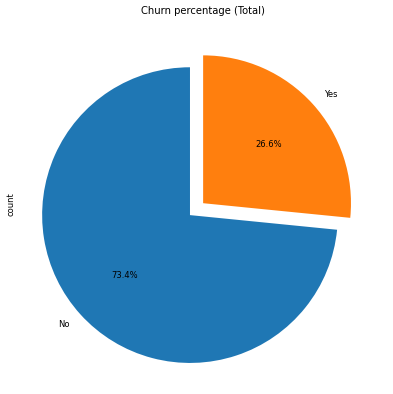

In [277]:
plt.figure(figsize=(10,10), dpi=60, facecolor='white')
df['Churn'].value_counts().plot(kind = 'pie',figsize=(12,8),autopct='%1.1f%%',
                          startangle=90,explode=[0.12,0])
plt.title('Churn percentage (Total)');
plt.show();

From the chart given above, we can say that 26.6% of customers churned and the rest 73.4% stayed

### Visual representation of every column
visual representation of how they affect the churn rate and that stats of the column

#### numerical columns

In [278]:
def num_summary(df, column_name, target):
    print({column_name.upper()})
    quantiles = [0.25, 0.50, 0.75]
    print(df.groupby(target)[column_name].describe(percentiles=quantiles))

    fig, axes = plt.subplots(2, 2, figsize=(10,6))
    sns.histplot(df[column_name], ax=axes[0, 0], color='red')
    sns.barplot(data=df, x=column_name, y=target, ax=axes[0, 1], palette=None, estimator=np.mean)
    sns.boxplot(data=df, y=column_name, ax=axes[1, 0], color='blue')
    sns.histplot(data=df, x=column_name, hue=target, kde=True, ax=axes[1, 1], palette=['green', 'blue'])
    plt.show()



def num_churn_kde(df, column_name, target):
  fig, ax = plt.subplots(figsize=(10,5))
  ax = sns.kdeplot(df[column_name][(df[target] == "No") ], color="Red", fill=True);
  ax = sns.kdeplot(df[column_name][(df[target] == "Yes") ], color="Blue", fill=True);
  ax.legend(["Not Churn","Churn"],loc='upper right');
  ax.set_ylabel('Density');
  ax.set_xlabel(column_name);
  ax.set_title('Distribution of {} by churn'.format(column_name));

{'TENURE'}
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


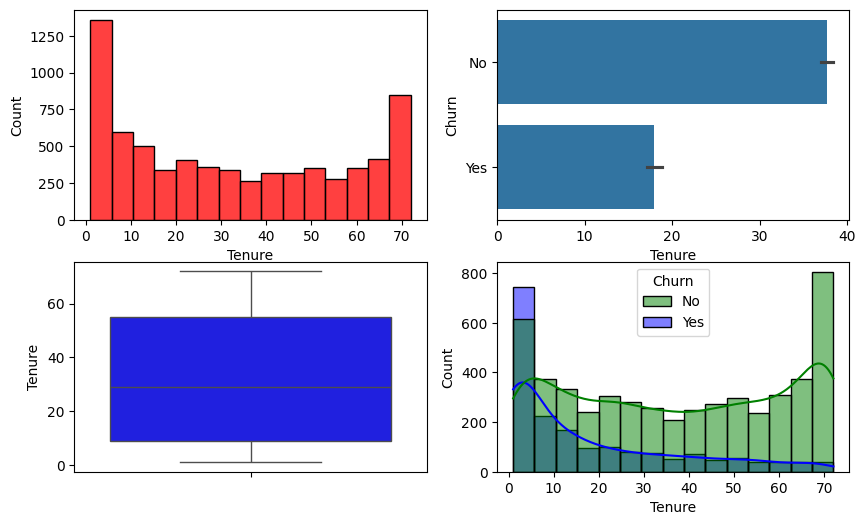

{'MONTHLYCHARGES'}
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


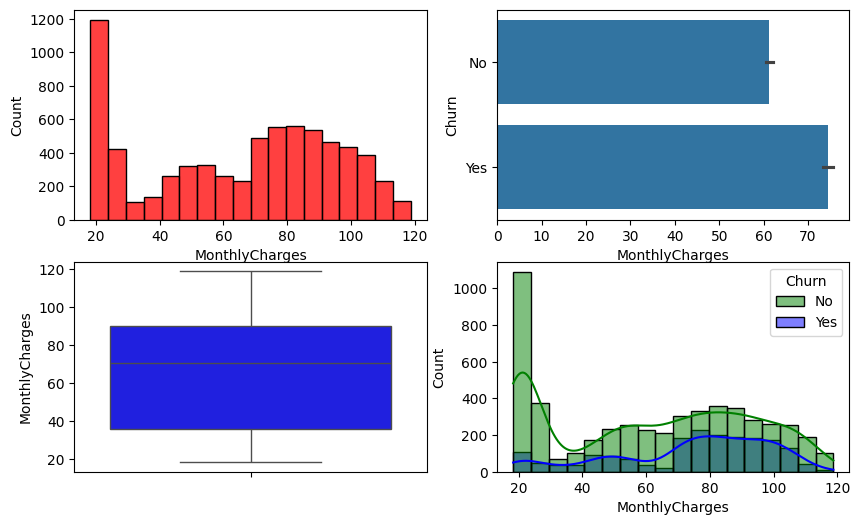

{'TOTALCHARGES'}
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


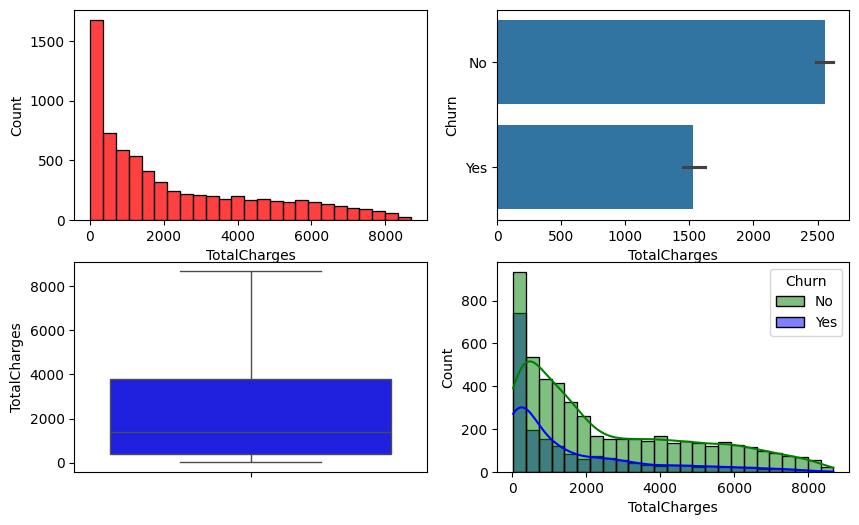

In [279]:
for i, column_name in enumerate(numeric_columns):
    num_summary(df, column_name, "Churn")

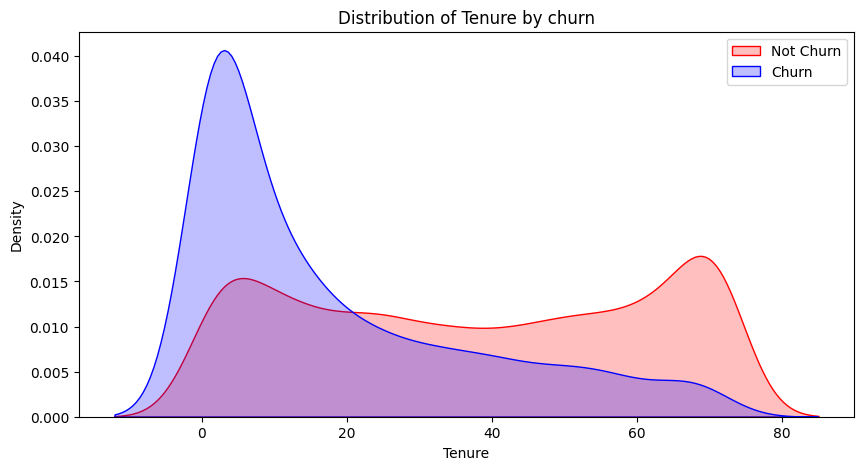

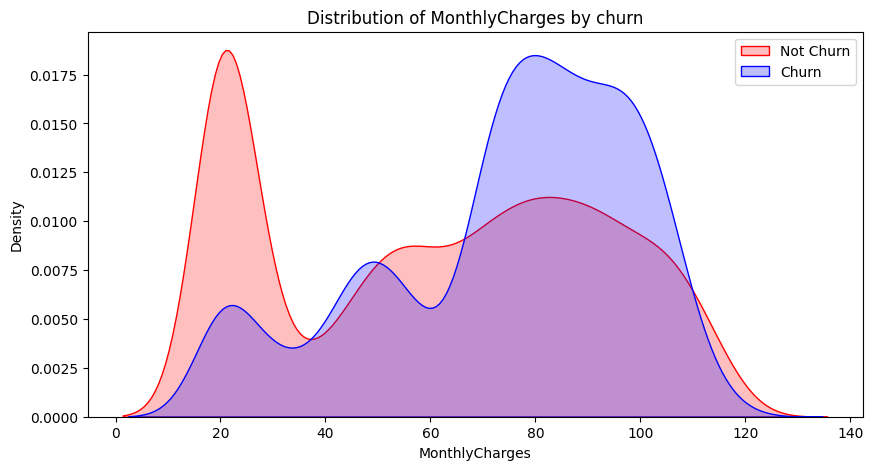

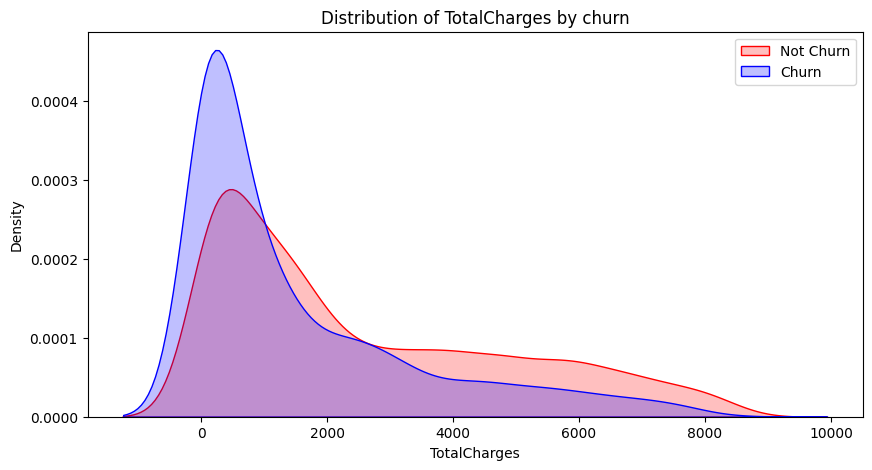

In [280]:
for column_name in numeric_columns:
    num_churn_kde(df, column_name, "Churn")

#### Categorical columns

In [281]:
def cat_summary(df2, column_name, target):
    print({column_name.upper()})

    print(df2[column_name].value_counts())

    plt.figure(figsize=(15, 8), dpi=60)
    plt.subplot(1, 3, 1)
    plt.pie(df2[column_name].value_counts().values.tolist(),
            labels=df2[column_name].value_counts().keys().tolist(),autopct='%0.2f')

    circle = plt.Circle((0, 0), 0.7,color='white')
    p = plt.gcf()
    p.gca().add_artist(circle)

    plt.subplot(1, 3, 2)
    sns.countplot(data=df2, x=column_name, palette=None)
    plt.tight_layout(pad=3)

    plt.subplot(1, 3, 3)
    sns.countplot(data=df2, x=column_name, hue=target, palette=None)

    plt.show()

{'GENDER'}
Gender
Male      3549
Female    3483
Name: count, dtype: int64


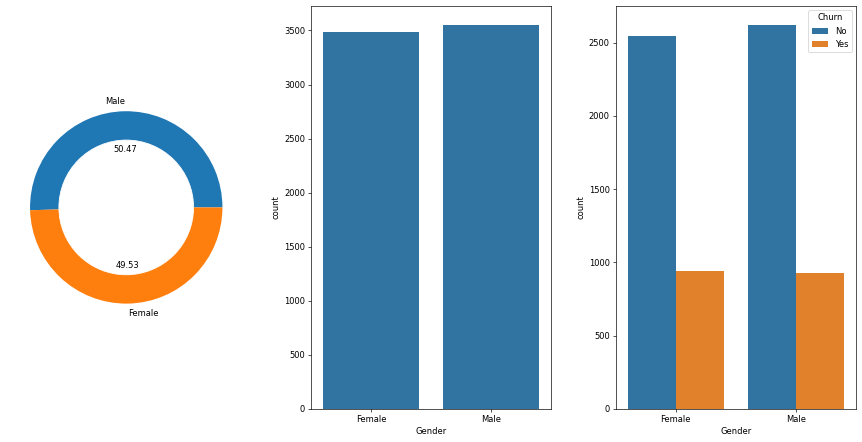

{'SENIORCITIZEN'}
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64


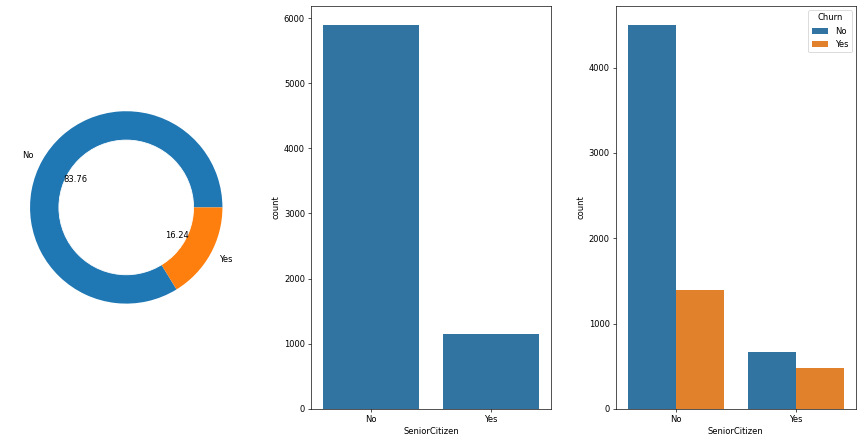

{'PARTNER'}
Partner
No     3639
Yes    3393
Name: count, dtype: int64


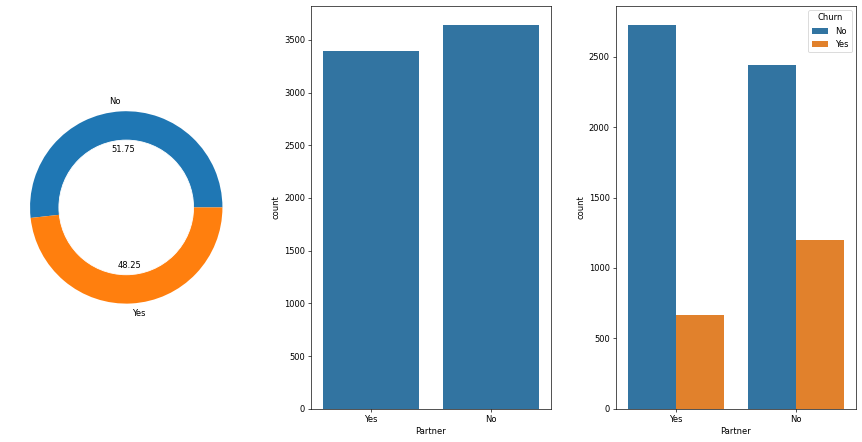

{'DEPENDENTS'}
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


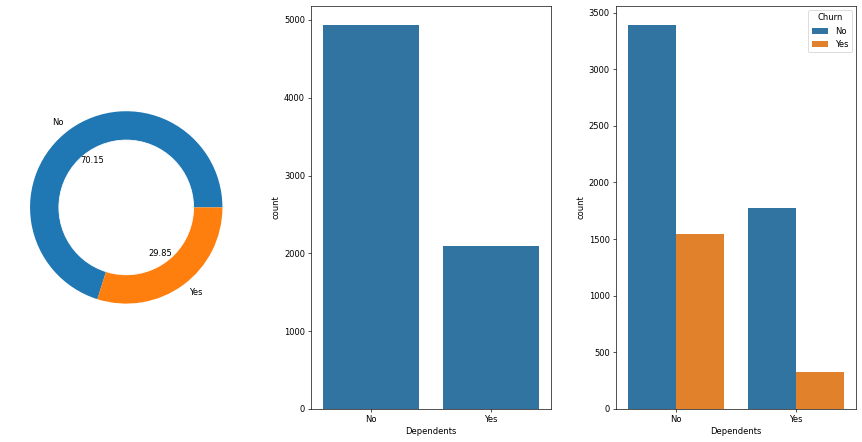

{'PHONESERVICE'}
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


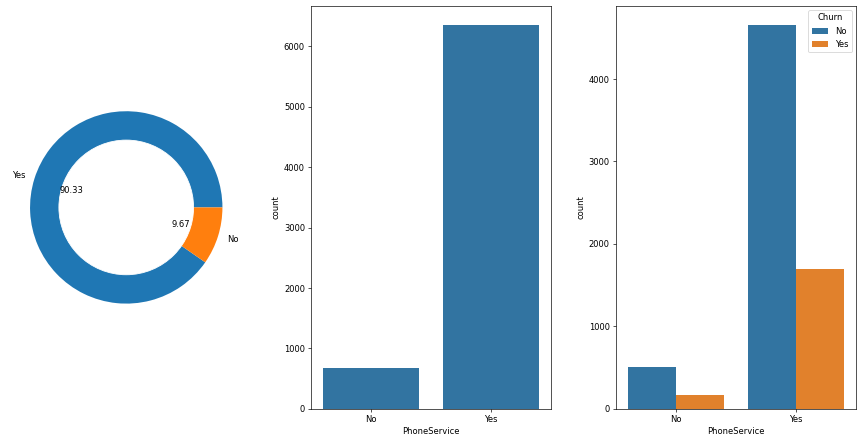

{'MULTIPLELINES'}
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


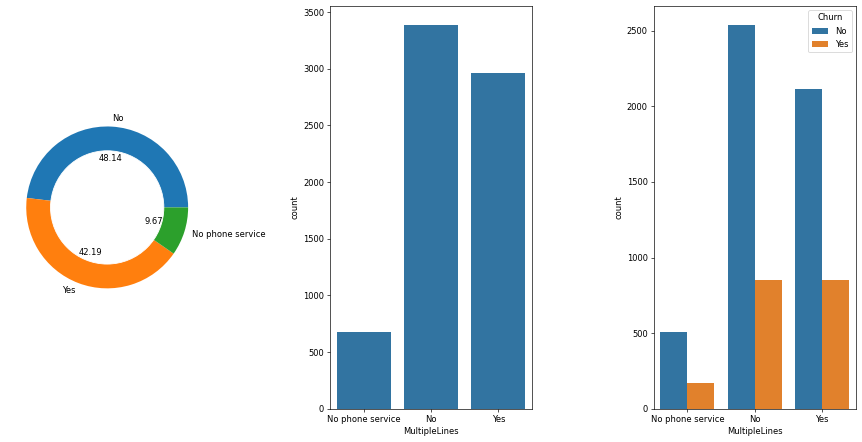

{'INTERNETSERVICE'}
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


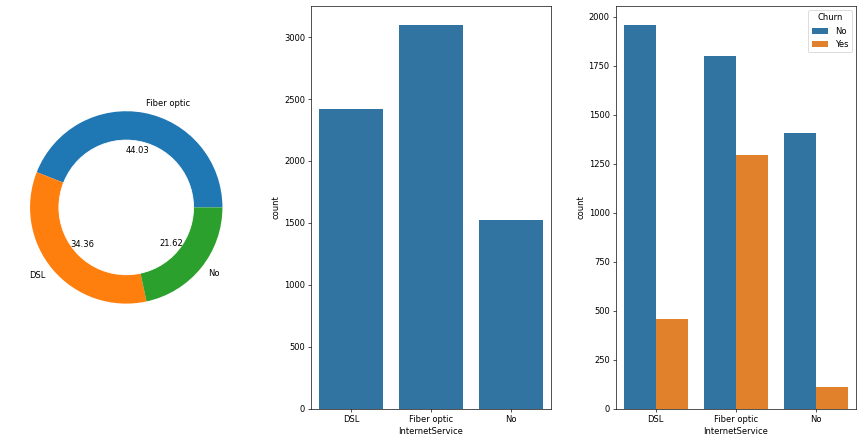

{'ONLINESECURITY'}
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


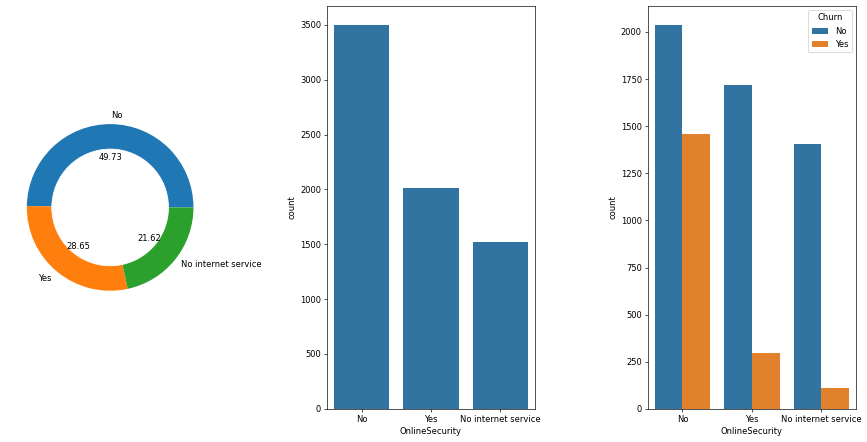

{'ONLINEBACKUP'}
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


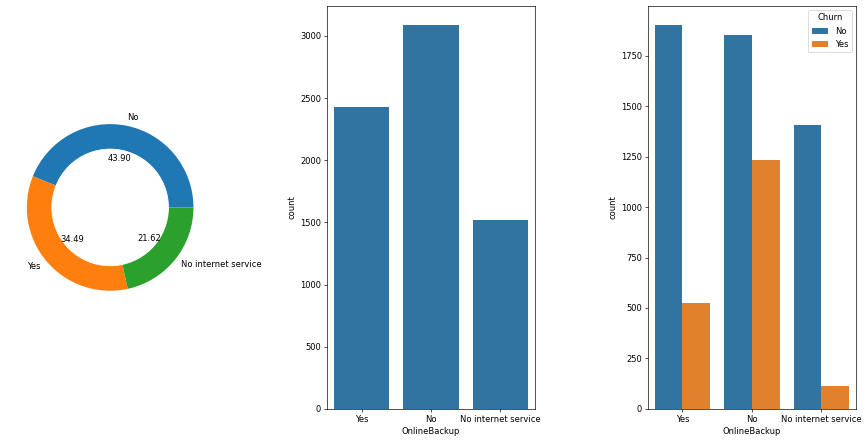

{'DEVICEPROTECTION'}
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


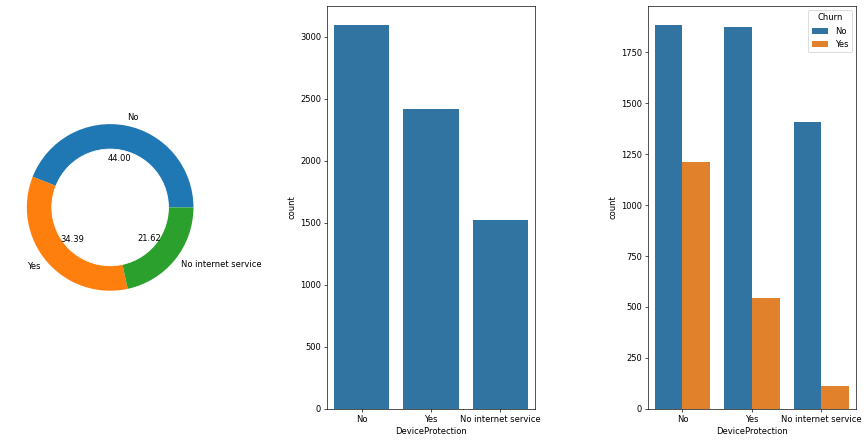

{'TECHSUPPORT'}
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


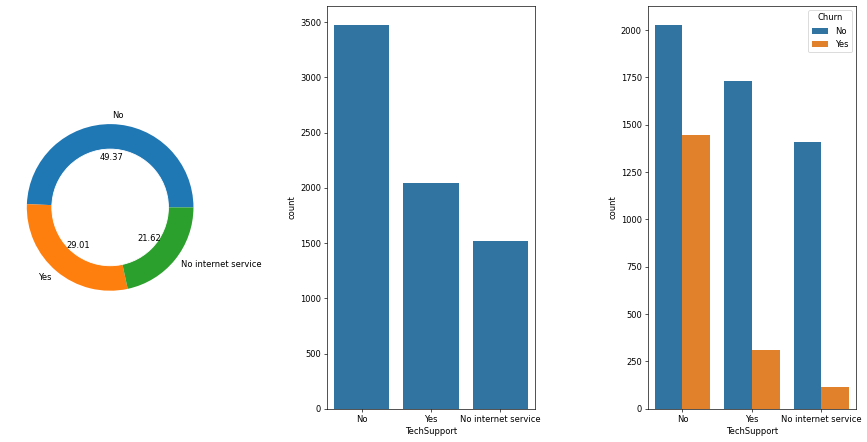

{'STREAMINGTV'}
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


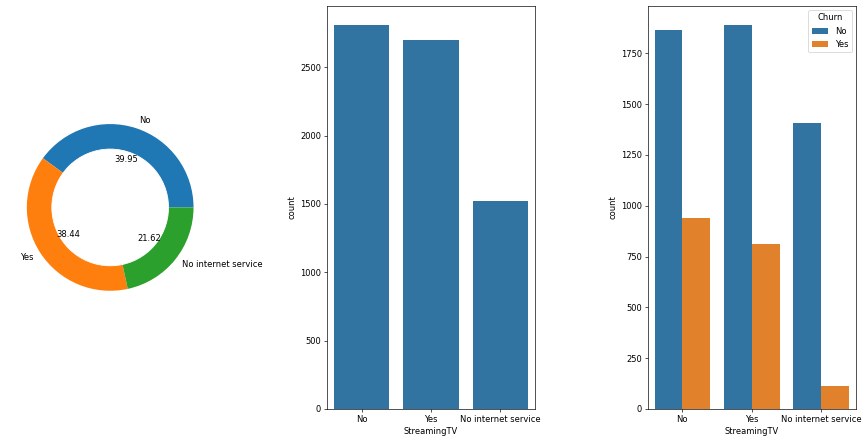

{'STREAMINGMOVIES'}
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


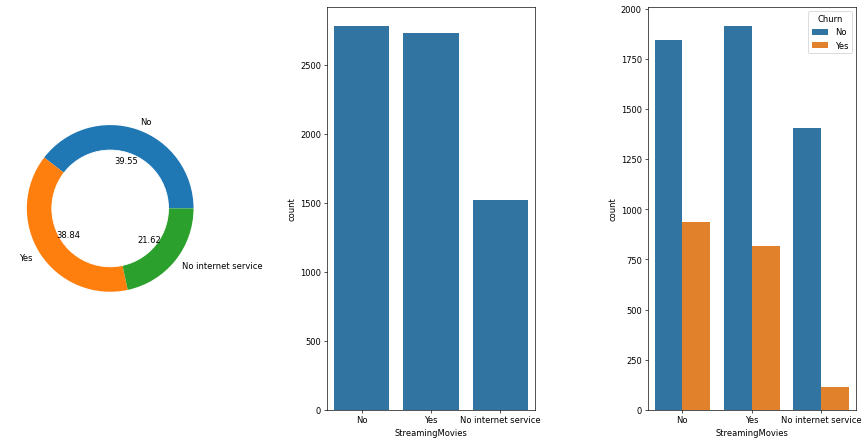

{'CONTRACT'}
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


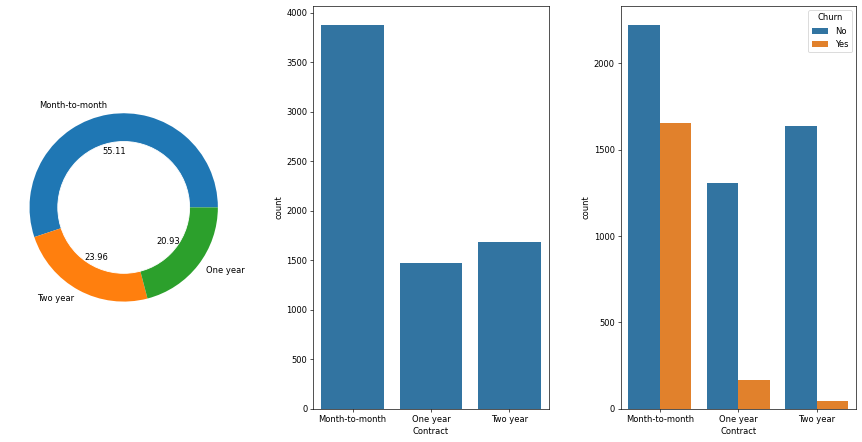

{'PAPERLESSBILLING'}
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64


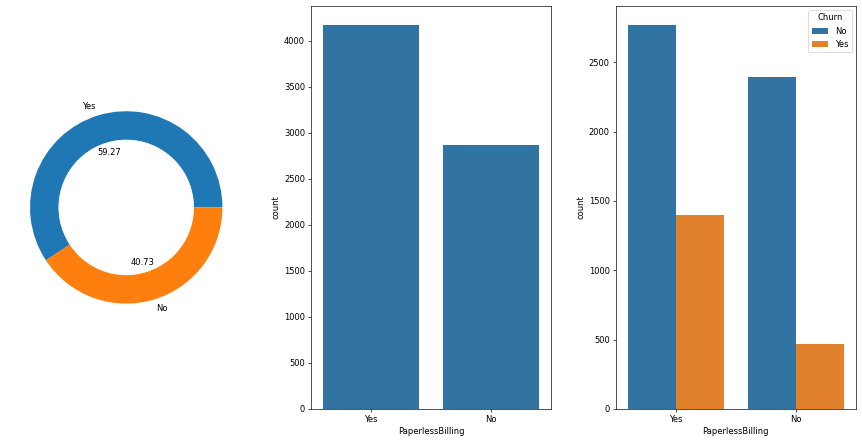

{'PAYMENTMETHOD'}
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


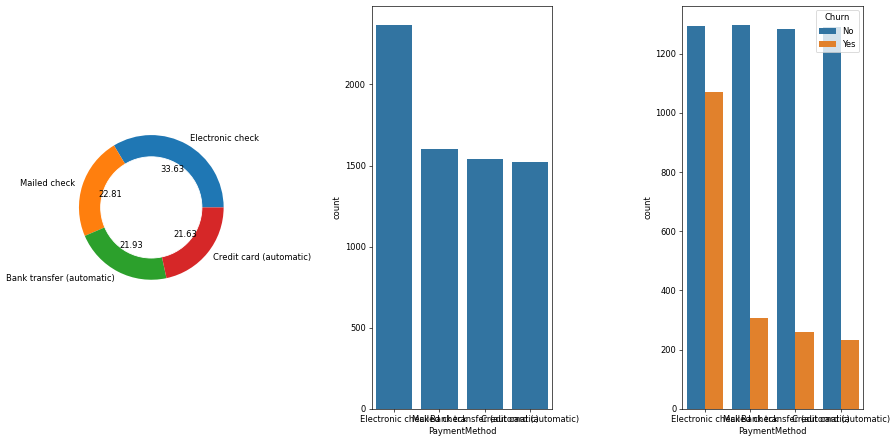

{'CHURN'}
Churn
No     5163
Yes    1869
Name: count, dtype: int64


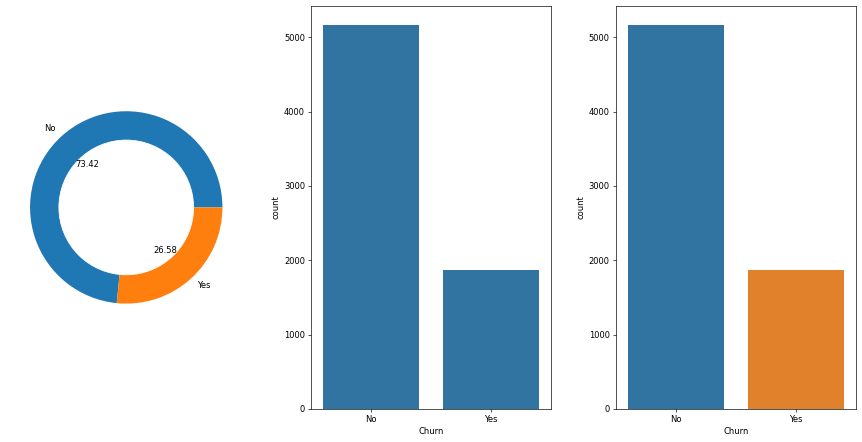

In [282]:
for col in catagorical_columns:
    cat_summary(df, col, "Churn")

#### Correlations of Churn with other variables

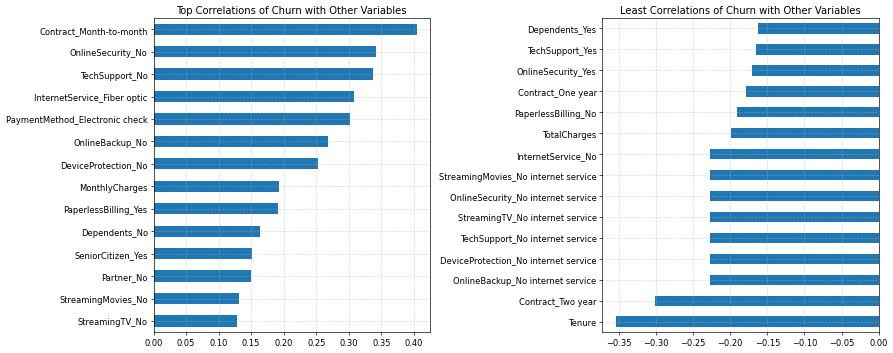

In [283]:
# remove "customerID" from the data set, since it is irrelevant
df.drop(columns='CustomerID', inplace=True)

# convert the predictor variable into binary numeric variable
lbe = LabelEncoder() # use the sklearn.LabelEncoder to do it
df['Churn'] = lbe.fit_transform(df['Churn'])  # "Yes"=1, "No"=0
# convert all categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

# get correlations of "Churn" with other variables
fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=60, facecolor='white', tight_layout=True)
df_dummies.corr()['Churn'].sort_values(ascending = True)[-15:-1].plot(kind='barh', ax=ax[0]);  ax[0].grid(ls='--', alpha=0.5);
df_dummies.corr()['Churn'].sort_values(ascending = True)[:15].plot(kind='barh', ax=ax[1]);  ax[1].grid(ls='--', alpha=0.5);
ax[0].set_title('Top Correlations of Churn with Other Variables');
ax[1].set_title('Least Correlations of Churn with Other Variables');

## 3. Modeling

In [284]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1 :  X' = (X - X_min) / (X_max - X_min)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 3.1 Logistic Regression Model

Logistic Regression is a statistical learning algorithm used to address classification problems. It is a widely used in machine learning and statistical analysis.

Logistic regression can be employed to build a model that predicts whether customers will churn based on the analysis of customer features (e.g., contract type, monthly charges, tenure, etc.). This is a typical binary classification problem where the goal is to predict whether customers will churn (1) or not (0).

In [285]:
# split the train-data : test-data into 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# apply the Logistic Regression model
lr_model = LogisticRegression()
result = lr_model.fit(X_train, y_train)

# use test-data to predict
lr_pred = lr_model.predict(X_test)
# Print the prediction accuracy
print ('Logistic Regression accuracy:', metrics.accuracy_score(y_test, lr_pred))

Logistic Regression accuracy: 0.8075829383886256


In [286]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



- accuracy: the ratio of the number of correctly predicted samples to the total number of samples. It is an overall performance metric used to assess the model's overall accuracy.

- precision: the ratio of the number of true positive predictions to the total number of positive predictions made by the model.

- recall: the ratio of the number of true positive predictions to the total number of actual positive samples. Recall measures the model's ability to correctly identify positive samples

- f1-score: the harmonic mean of precision and recall. It provides a balanced measure of a model's precision and recall.

- support: refers to the number of samples in each class

- macro avg: treats all classes equally and is appropriate when you want to assess the model's performance without considering class imbalances

- weighted avg: considers class imbalances and is useful when you want to measure overall performance while giving more weight to classes with larger support

Logistic regression models provide coefficients for each feature, which can be used to assess the impact of different features on customer churn. This helps in understanding which factors are most important and taking actions to reduce churn rates.

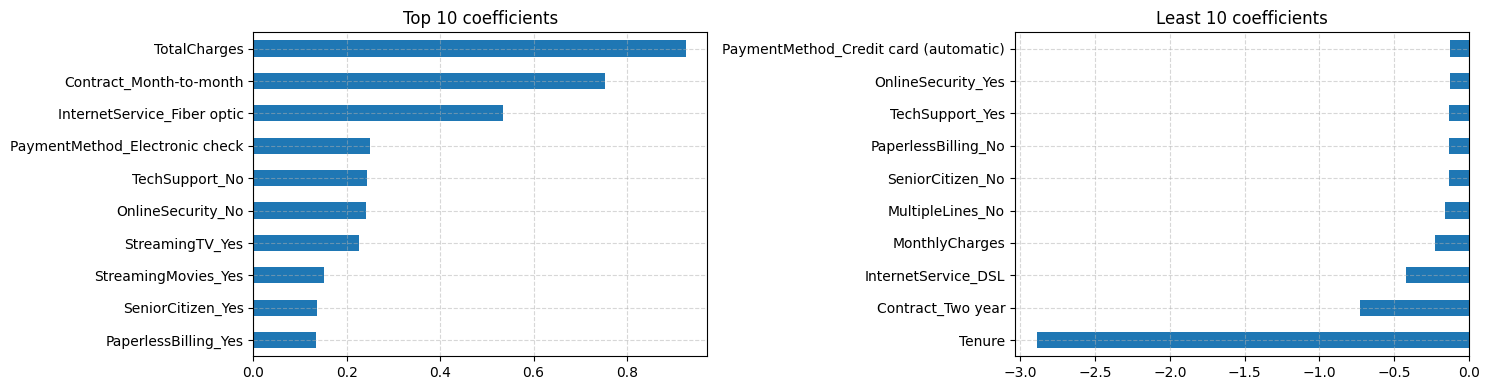

In [287]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0], index=X.columns.values).sort_values(ascending=True)

fig, ax = plt.subplots(1,2, figsize=(15,4), facecolor='white', tight_layout=True)
weights[-10:].plot(kind='barh', ax=ax[0]); ax[0].grid(ls='--', alpha=0.5)
ax[0].set_title('Top 10 coefficients');
weights[:10].plot(kind='barh', ax=ax[1]); ax[1].grid(ls='--', alpha=0.5)
ax[1].set_title('Least 10 coefficients');

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation.

- total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

- 2-year-contract along with tenure have the most negative relation with Churn as predicted by logistic regressions. And having the DSL internet service also redues the probability of Churn

Also, if we have a new data point, and we can predict wheter this customer will churn, just like this:

```python
import numpy as np
# model coefficients and intercept
coefficients = lr_model.coef_
intercept = lr_model.intercept_
# features of the new data point, including the dummy variables
new_data_point = np.array([x1, x2, x3, ...])  
# compute the log-odds
log_odds = intercept + np.sum(coefficients * new_data_point)
# compute the probability
probability = 1 / (1 + np.exp(-log_odds))
# Predict based on probability threshold
if probability >= 0.5:
    predicted_class = 1  # churned
else:
    predicted_class = 0  # not churned
```

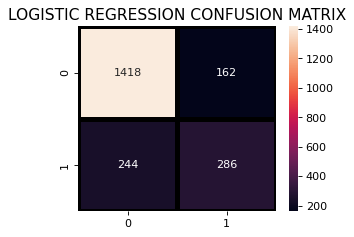

In [288]:
plt.figure(figsize=(4,3), dpi=80, facecolor='white')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt = "d",linecolor="k",linewidths=3);

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14);

From the confusion matrix we can see that:
- There are total 1418+162=1580 actual non-churn values and the model predicts 1418 of them as non churn and 162 of them as churn.
- While there are 244+286=530 actual churn values and the model predicts 244 of them as non churn values and 286 of them as churn values

AUC = 0.8341885598280392


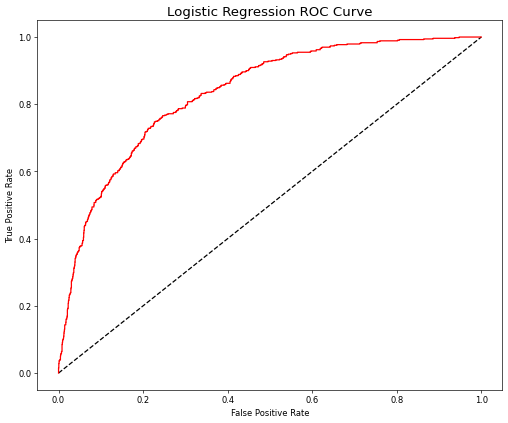

In [289]:
y_lr_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_lr_pred_prob)

plt.figure(figsize=(10,8), dpi=60, facecolor='white')
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Logistic Regression ROC Curve',fontsize=16)
print('AUC =', metrics.auc(fpr_lr, tpr_lr))

AUC is a metric that ranges between 0 and 1, where 0.5 indicates that the model's performance is no better than random guessing, and 1 indicates perfect model performance.

In this case, an AUC value of *0.834* is relatively high, indicating that your model has good discriminative power.

### 3.2 Random Forest Classifier Model

Random Forest can be used to build a churn prediction model. By analyzing customer features (e.g., contract type, monthly charges, tenure, etc.), it predicts whether a customer is likely to churn.

In [290]:
# spliting the train-data : test-data into 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# apply the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_leaf_nodes = 30)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
# Print the prediction accuracy

print ('Random Forest accuracy:', metrics.accuracy_score(y_test, rf_pred))

Random Forest accuracy: 0.8104265402843602


In [291]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.67      0.49      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



When a new data point comes, we can predict if it will churn with the model we have trained:

```Python
# new data point  with features
X_new = [[...], [...], ...]
# input the new data to predict
predictions = rf_model.predict(X_new)
# prediction 
for prediction in predictions:
    if prediction == 1:
        print("Churn")
    else:
        print("Not Churn")
```

Random Forest provides feature importance scores, which can be used to evaluate the impact of different features on customer churn. This helps in understanding the key factors contributing to customer churn.

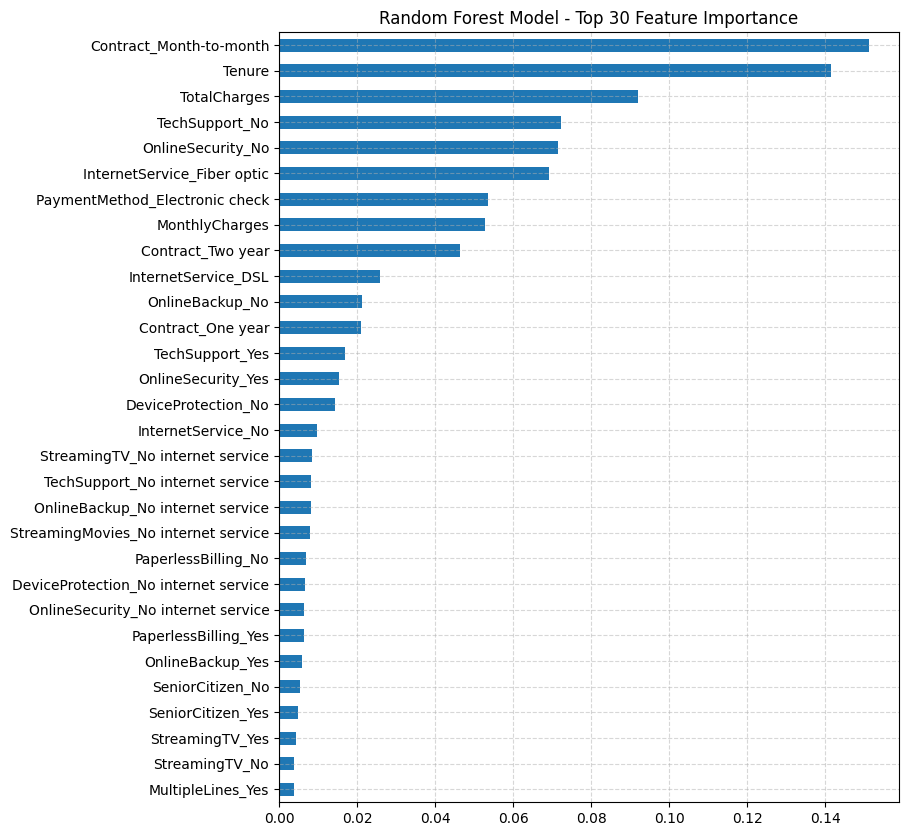

In [292]:
importances = rf_model.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=True)

plt.figure(figsize=(8,10), facecolor='white')
weights[-30:].plot(kind = 'barh');
plt.grid(True, alpha=0.5, ls='--');
plt.title('Random Forest Model - Top 30 Feature Importance');

From random forest model, monthly contract, tenure and total charges are the most important predictor variables to predict churn

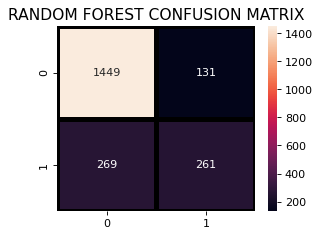

In [293]:
plt.figure(figsize=(4,3), dpi=80, facecolor='white')
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt = "d",linecolor="k",linewidths=3);

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14);

From the confusion matrix we can see that:
- There are total 1449+131=1580 actual non-churn values and the algorithm predicts 1449 of them as non churn and 131 of them as churn.
- While there are 269+261=530 actual churn values and the algorithm predicts 269 of them as non churn values and 261 of them as churn values

AUC = 0.8334565321232386


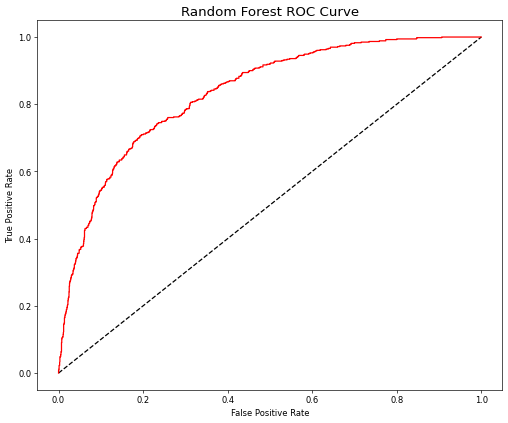

In [294]:
y_rf_pred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rf_pred_prob)

plt.figure(figsize=(10,8), dpi=60, facecolor='white')
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Random Forest ROC Curve',fontsize=16)
print('AUC =', metrics.auc(fpr_rf, tpr_rf))